In [1]:
from metrics.evaluation import cross_validate_stratify, present_metrics
from sklearn import preprocessing
from sklearn.cross_validation import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import SVC

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

using it all together

In [2]:
label = pd.read_csv("data/dataset.csv")
labely = label.iloc[:, 13].values
sss = StratifiedShuffleSplit(labely, n_iter=1, test_size=0.4, random_state=0)

for train_index, test_index in sss:
    train_indices= train_index
    test_indices = test_index
skf = StratifiedKFold(labely[train_indices], n_folds=3)

# DATA SET INDIVIDUAL

In [3]:
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 45)].values)
y = df.iloc[:, 45].values

svm = SVC(class_weight='balanced', probability=True)

resulti_all = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_all = resulti_all["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_all["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_all["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_all["matt_cross_val"])
print "GMEAN: " + str(resulti_all["gmean_cross_val"])
print ""
present_metrics(gmeani_all, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.814814814815
SPECIFICITY: 0.969168428471
MATTHEWS CORR COEF: 0.785953677618
GMEAN: 0.877187160928

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 1.0
MATTHEWS CORR COEF: 1.0
GMEAN: 1.0


CONFUSION MATRIX
10	0
0	43

####### TEST GMEAN #######
SENSITIVITY: 0.736842105263
SPECIFICITY: 0.931818181818
MATTHEWS CORR COEF: 0.655464300192
GMEAN: 0.828615031733


CONFUSION MATRIX
14	5
6	82


# DATA SET INDIVIDUAL NO VORONOI TESSELLATION

In [4]:
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 40)].values)
y = df.iloc[:, 45].values

svm = SVC(class_weight='balanced', probability=True)

resulti_novoronoi = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_novoronoi = resulti_novoronoi["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_novoronoi["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_novoronoi["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_novoronoi["matt_cross_val"])
print "GMEAN: " + str(resulti_novoronoi["gmean_cross_val"])
print ""
present_metrics(gmeani_novoronoi, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.814814814815
SPECIFICITY: 0.953840732911
MATTHEWS CORR COEF: 0.753453678438
GMEAN: 0.870636866192

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 1.0
MATTHEWS CORR COEF: 1.0
GMEAN: 1.0


CONFUSION MATRIX
10	0
0	43

####### TEST GMEAN #######
SENSITIVITY: 0.789473684211
SPECIFICITY: 0.931818181818
MATTHEWS CORR COEF: 0.69401730299
GMEAN: 0.857698043028


CONFUSION MATRIX
15	4
6	82


# DATA SET ALL MEAN

In [5]:
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 13)].values)
y = df.iloc[:, 13].values

svm = SVC(class_weight='balanced', probability=True)

resultm_all = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_all = resultm_all["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_all["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_all["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_all["matt_cross_val"])
print "GMEAN: " + str(resultm_all["gmean_cross_val"])
print ""
present_metrics(gmeanm_all, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.851851851852
SPECIFICITY: 0.922656800564
MATTHEWS CORR COEF: 0.724616376397
GMEAN: 0.881486099966

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 0.977272727273
MATTHEWS CORR COEF: 0.94256551606
GMEAN: 0.988571053224


CONFUSION MATRIX
10	0
1	43

####### TEST GMEAN #######
SENSITIVITY: 0.842105263158
SPECIFICITY: 0.909090909091
MATTHEWS CORR COEF: 0.688219281399
GMEAN: 0.87495727852


CONFUSION MATRIX
16	3
8	80


# DATA SET ALL MEAN NO VORONOI

In [6]:
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 8)].values)
y = df.iloc[:, 13].values

svm = SVC(class_weight='balanced', probability=True)

resultm_novoronoi = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_novoronoi = resultm_novoronoi["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_novoronoi["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_novoronoi["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_novoronoi["matt_cross_val"])
print "GMEAN: " + str(resultm_novoronoi["gmean_cross_val"])
print ""
present_metrics(gmeanm_novoronoi, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.925925925926
SPECIFICITY: 0.900105708245
MATTHEWS CORR COEF: 0.735967450417
GMEAN: 0.911239590881

####### TRAIN GMEAN #######
SENSITIVITY: 1.0
SPECIFICITY: 0.906976744186
MATTHEWS CORR COEF: 0.804885415175
GMEAN: 0.952353266486


CONFUSION MATRIX
10	0
4	39

####### TEST GMEAN #######
SENSITIVITY: 0.894736842105
SPECIFICITY: 0.863636363636
MATTHEWS CORR COEF: 0.652010840824
GMEAN: 0.879049072992


CONFUSION MATRIX
17	2
12	76


#### DATA SET INDIVIDUAL  
SENSITIVITY: 0.736842105263  
SPECIFICITY: 0.931818181818  
MATTHEWS CORR COEF: 0.655464300192  
GMEAN: 0.828615031733  
  
      
#### DATA SET INDIVIDUAL NO VORONOI TESSELLATION  
SENSITIVITY: 0.789473684211  
SPECIFICITY: 0.931818181818  
MATTHEWS CORR COEF: 0.69401730299  
GMEAN: 0.857698043028  
  
#### DATA SET ALL MEAN  
SENSITIVITY: 0.842105263158  
SPECIFICITY: 0.909090909091  
MATTHEWS CORR COEF: 0.688219281399  
GMEAN: 0.87495727852  
  
#### DATA SET ALL MEAN NO VORONOI  
SENSITIVITY: 0.894736842105  
SPECIFICITY: 0.863636363636  
MATTHEWS CORR COEF: 0.652010840824  
GMEAN: 0.879049072992  

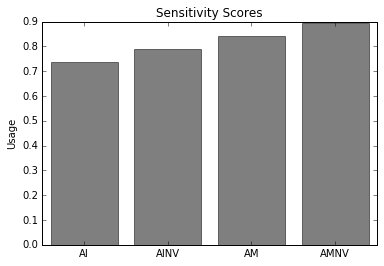

In [7]:
labels = ('AI', 'AINV', 'AM', 'AMNV')
y_pos = np.arange(len(labels))
performance = [gmeani_all[2][0], gmeani_novoronoi[2][0], gmeanm_all[2][0], gmeanm_novoronoi[2][0]]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='k')
plt.xticks(y_pos, labels)
plt.ylabel('Usage')
plt.title('Sensitivity Scores')
 
plt.show()

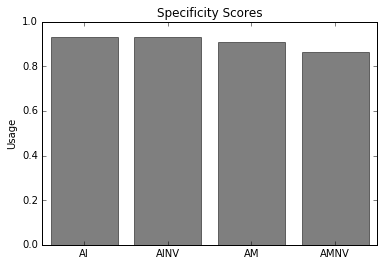

In [8]:
labels = ('AI', 'AINV', 'AM', 'AMNV')
y_pos = np.arange(len(labels))
performance = [gmeani_all[2][1], gmeani_novoronoi[2][1], gmeanm_all[2][1], gmeanm_novoronoi[2][1]]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='k')
plt.xticks(y_pos, labels)
plt.ylabel('Usage')
plt.title('Specificity Scores')
 
plt.show()

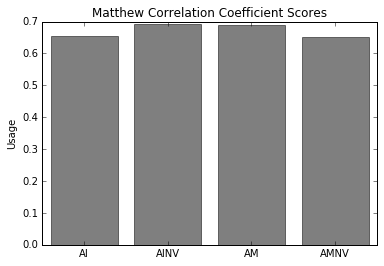

In [9]:
labels = ('AI', 'AINV', 'AM', 'AMNV')
y_pos = np.arange(len(labels))
performance = [gmeani_all[2][2], gmeani_novoronoi[2][2], gmeanm_all[2][2], gmeanm_novoronoi[2][2]]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='k')
plt.xticks(y_pos, labels)
plt.ylabel('Usage')
plt.title('Matthew Correlation Coefficient Scores')
 
plt.show()

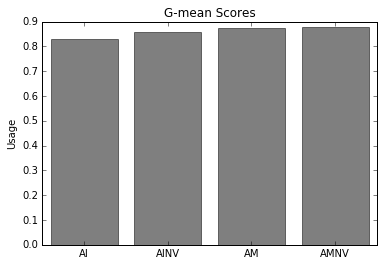

In [10]:
labels = ('AI', 'AINV', 'AM', 'AMNV')
y_pos = np.arange(len(labels))
performance = [gmeani_all[2][3], gmeani_novoronoi[2][3], gmeanm_all[2][3], gmeanm_novoronoi[2][3]]

plt.bar(y_pos, performance, align='center', alpha=0.5, color='k')
plt.xticks(y_pos, labels)
plt.ylabel('Usage')
plt.title('G-mean Scores')
 
plt.show()